In [44]:
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier


cancer = load_breast_cancer()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
svm = SVC()
svm.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
print(f"Testing set score: {svm.score(X_test_scaled, y_test):.2f}")

Testing set score: 0.97


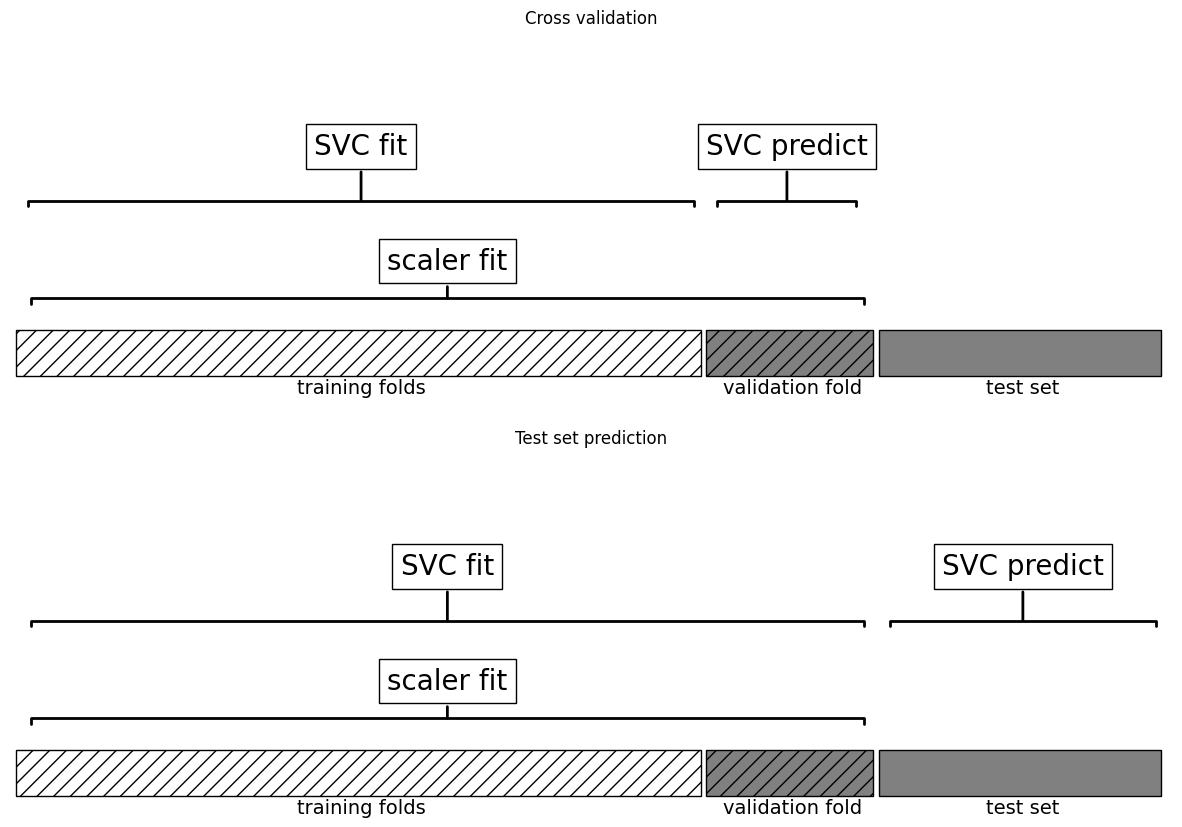

In [8]:
# 6.1. Parameter Selection with Preprocessing

mglearn.plots.plot_improper_processing()


In [11]:
# 6.2. Building Pipelines

pipe = Pipeline([("scaler", MinMaxScaler()), ('svm', SVC())])
pipe.fit(X_train, y_train)
print(f"Testing set score: {pipe.score(X_test, y_test):.2f}")

Testing set score: 0.97


In [24]:
# 6.3. Using Pipelines in Grid Searches

param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100], 'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print(f"Cross-validation best score: {grid.best_score_:.2f}")
print(f"Testing set best score: {grid.score(X_test, y_test):.2f}")
print(f"Best parameters: {grid.best_params_}")

Cross-validation best score: 0.98
Testing set best score: 0.97
Best parameters: {'svm__C': 1, 'svm__gamma': 1}


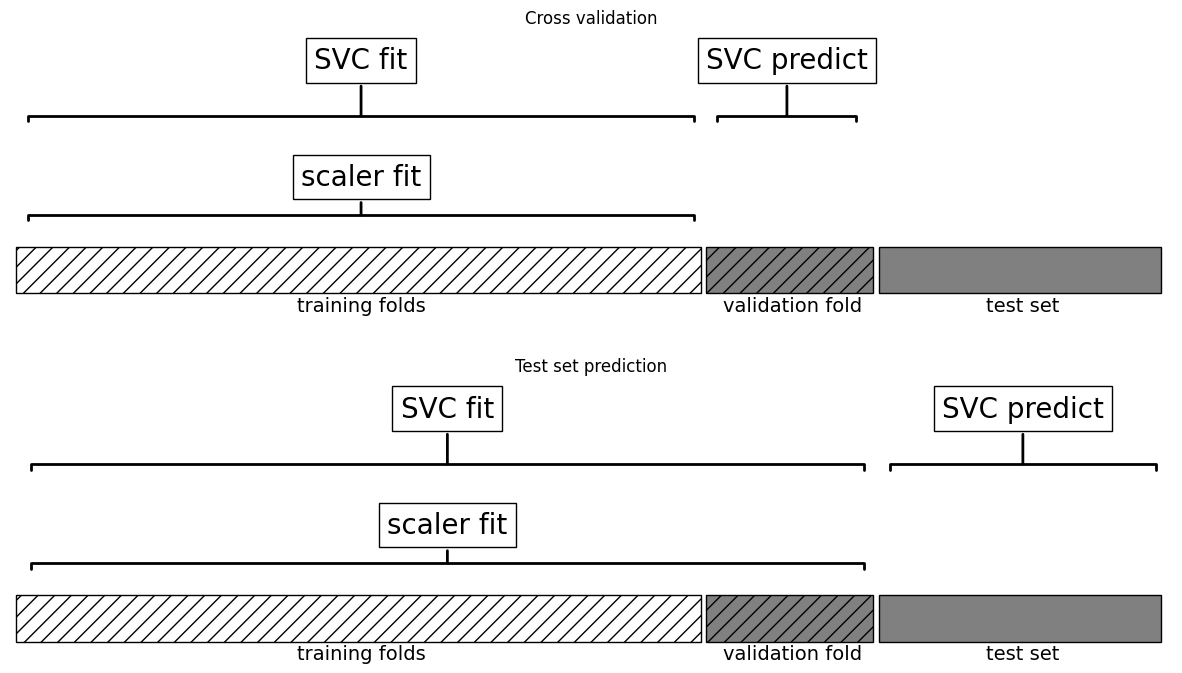

In [17]:
mglearn.plots.plot_proper_processing()

In [21]:
rnd = np.random.RandomState(seed=0)
X = rnd.normal(size=(100, 10000))
y = rnd.normal(size=(100,))

select = SelectPercentile(score_func=f_regression, percentile=5).fit(X, y)
X_selected = select.transform(X)
print(f"X_selected.shape: {X_selected.shape}")

X_selected.shape: (100, 500)


/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [25]:
print(f"Cross-validation accuracy (only cv for Ridge): {np.mean(cross_val_score(Ridge(), X_selected, y, cv=5)):.2f}")

Cross-validation accuracy (only cv for Ridge): 0.91


/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-package

In [26]:
pipe = Pipeline([("select", SelectPercentile(score_func=f_regression, percentile=5)), ("ridge", Ridge())])
print(f"Cross-validation score (pipeline): {np.mean(cross_val_score(pipe, X, y, cv=5)):.2f}")

Cross-validation score (pipeline): -0.25


/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid 

In [ ]:
# 6.4. The General Pipeline Interface

def fit(self, X, y):
    X_transformed = X
    for name, estimator in self.steps[:-1]:
        X_transformed = estimator.fit_transform(X_transformed, y)
    self.steps[-1][1].fit(X_transformed, y)
    return self

def predict(self, X):
    X_transformed = X
    for step in self.steps[:-1]:
        X_transformed = step[1].transform(X_transformed)
    return self.steps[-1][1].predict(X_transformed)

In [28]:
# 6.4.1. Convenient Pipeline Creation with make_pipeline

pipe_long = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC(C=100))])
pipe_short = make_pipeline(MinMaxScaler(), SVC(C=100))

print(f"Pipeline steps:\n{pipe_short.steps}")

Pipeline steps:
[('minmaxscaler', MinMaxScaler()), ('svc', SVC(C=100))]


In [30]:
pipe = make_pipeline(StandardScaler(), PCA(n_components=2), StandardScaler())
print(f"Pipeline steps:\n{pipe.steps}")

Pipeline steps:
[('standardscaler-1', StandardScaler()), ('pca', PCA(n_components=2)), ('standardscaler-2', StandardScaler())]


In [31]:
# 6.4.2. Accessing Step Attributes

pipe.fit(cancer.data)
components = pipe.named_steps["pca"].components_
print(f"components.shape: {components.shape}")

components.shape: (2, 30)


/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/metju29/CursorProjects/data-learning/.venv/li

In [ ]:
# 6.4.3. Accessing Attributes in a Pipeline inside GridSearchCV

pipe = make_pipeline(StandardScaler(), LogisticRegression())
param_grid = {"logisticregression__C": [0.01, 0.1, 1, 10, 100]}
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=4)
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print(f"Best estimator:\n{grid.best_estimator_}")

Best estimator:
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=1))])


/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_los

In [34]:
print(f"Logistic regression step:\n{grid.best_estimator_.named_steps["logisticregression"]}")

Logistic regression step:
LogisticRegression(C=1)


In [35]:
print(f"Logistic Regression coef:\n{grid.best_estimator_.named_steps["logisticregression"].coef_}")

Logistic Regression coef:
[[-0.4475566  -0.34609376 -0.41703843 -0.52889408 -0.15784407  0.60271339
  -0.71771325 -0.78367478  0.04847448  0.27478533 -1.29504052  0.05314385
  -0.69103766 -0.91925087 -0.14791795  0.46138699 -0.1264859  -0.10289486
   0.42812714  0.71492797 -1.08532414 -1.09273614 -0.85133685 -1.04104568
  -0.72839683  0.07656216 -0.83641023 -0.64928603 -0.6491432  -0.42968125]]


/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/linear_model

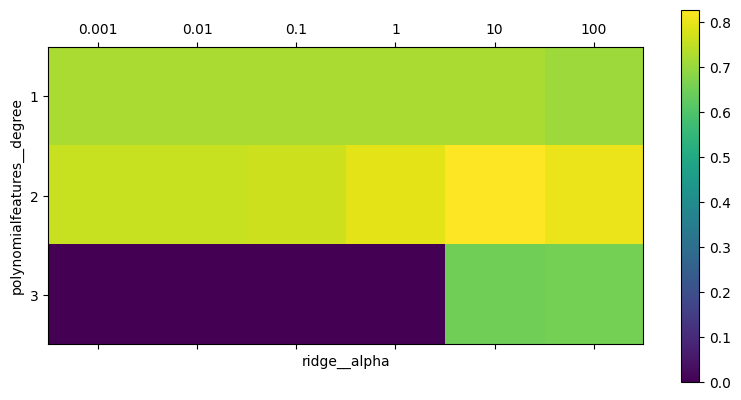

In [40]:
# 6.5. Grid-Searching Preprocessing Steps and Model Parameters

url = "http://lib.stat.cmu.edu/datasets/boston"
boston = pd.read_csv(url, sep=r"\s+", skiprows=22, header=None)
X = np.hstack([boston.values[::2, :], boston.values[1::2, :2]])
y = boston.values[1::2, 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(),
    Ridge()
)

param_grid = {'polynomialfeatures__degree': [1, 2, 3], 'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

plt.matshow(grid.cv_results_['mean_test_score'].reshape(3, -1), vmin=0, cmap="viridis")
plt.xlabel("ridge__alpha")
plt.ylabel("polynomialfeatures__degree")
plt.xticks(range(len(param_grid['ridge__alpha'])), param_grid['ridge__alpha'])
plt.yticks(range(len(param_grid['polynomialfeatures__degree'])), param_grid['polynomialfeatures__degree'])
plt.colorbar()

In [41]:
print(f"Best parameters: {grid.best_params_}")

Best parameters: {'polynomialfeatures__degree': 2, 'ridge__alpha': 10}


In [42]:
print(f"Testing set score: {grid.score(X_test, y_test):.2f}")

Testing set score: 0.77


/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [43]:
param_grid = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
pipe = make_pipeline(StandardScaler(), Ridge())
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print(f"Result without polynomial features: {grid.score(X_test, y_test):.2f}")


Result without polynomial features: 0.63


/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid 

In [ ]:
# 6.6. Grid-Searching Which Model To Use

pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])
param_grid = [
    {'classifier': [SVC()], 'preprocessing': [StandardScaler(), None],
    'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'classifier': [RandomForestClassifier(n_estimators=100)],
    'preprocessing': [None], 'classifier__max_features': [1, 2, 3]}
]

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

print(f"Best parameters:\n{grid.best_params_}\n")
print(f"Cross-validation best score: {grid.best_score_:.2f}")
print(f"Testing set score: {grid.score(X_test, y_test):.2f}")

Best parameters:
{'classifier': SVC(), 'classifier__C': 10, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler()}

Cross-validation best score: 0.99
Testing set score: 0.98
